# Cyberbullying detection using machine learining

In [1]:
# for Python 2: use print only as a function
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
from math import log, sqrt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import spacy
import re
%matplotlib inline

In [4]:
# read file into pandas using a relative path
tweet = pd.read_csv("data/h.csv", encoding="ISO-8859-1")

In [5]:
# examine the shape
tweet.shape

(19001, 4)

In [6]:
# examine the first 10 rows
tweet.head(10)

,content,annotation__notes,annotation__label__-,extras
0,I hate .... you .... zzzzzzzz,NaN,1,NaN
1,Hey... Stop twitting and post a damn blog!,NaN,1,NaN
2,http://twitpic.com/qtt0 - O.O bingo is waaaaay...,NaN,1,NaN
3,xD! i know. hmm ....i wonder how it feels like...,NaN,1,NaN
4,oh youuuu little bitch. Just keep your winter ...,NaN,1,NaN
5,not to sound amazingly astoundingly gay (not ...,NaN,1,NaN
6,as much as i hate auto-DM's i also check out ...,NaN,1,NaN
7,I'm blocking you because you have no value. Go...,NaN,1,NaN
8,If only Edward and Bella were slightly less em...,NaN,1,NaN
9,@scanman and @asthepumpturns. Yeah I am a mea...,NaN,1,NaN


In [7]:
tweet.rename(columns = {"annotation__label__-": "label", "content": "tweet"}, inplace = True)
tweet.drop(['annotation__notes'], axis = 1, inplace = True)
tweet.drop(['extras'], axis = 1, inplace = True)
tweet.head(10)

,tweet,label
0,I hate .... you .... zzzzzzzz,1
1,Hey... Stop twitting and post a damn blog!,1
2,http://twitpic.com/qtt0 - O.O bingo is waaaaay...,1
3,xD! i know. hmm ....i wonder how it feels like...,1
4,oh youuuu little bitch. Just keep your winter ...,1
5,not to sound amazingly astoundingly gay (not ...,1
6,as much as i hate auto-DM's i also check out ...,1
7,I'm blocking you because you have no value. Go...,1
8,If only Edward and Bella were slightly less em...,1
9,@scanman and @asthepumpturns. Yeah I am a mea...,1


In [8]:
# examine the class distribution
tweet.label.value_counts()

0    11162
1     7839
Name: label, dtype: int64

In [9]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet['tweet'].head(10)

0                        i hate .... you .... zzzzzzzz
1           hey... stop twitting and post a damn blog!
2    http://twitpic.com/qtt0 - o.o bingo is waaaaay...
3    xd! i know. hmm ....i wonder how it feels like...
4    oh youuuu little bitch. just keep your winter ...
5    not to sound amazingly astoundingly gay (not t...
6    as much as i hate auto-dm's i also check out l...
7    i'm blocking you because you have no value. go...
8    if only edward and bella were slightly less em...
9    @scanman and @asthepumpturns. yeah i am a mean...
Name: tweet, dtype: object

In [10]:
tweet['tweet'] = tweet['tweet'].str.replace('[^\w\s]','')
tweet['tweet'] = tweet['tweet'].str.replace(r'_','')
tweet['tweet'].head(10)

0                                i hate  you  zzzzzzzz
1               hey stop twitting and post a damn blog
2    httptwitpiccomqtt0  oo bingo is waaaaay to har...
3    xd i know hmm i wonder how it feels like to fu...
4    oh youuuu little bitch just keep your winter g...
5    not to sound amazingly astoundingly gay not th...
6    as much as i hate autodms i also check out lin...
7    im blocking you because you have no value go b...
8     if only edward and bella were slightly less emo 
9    scanman and asthepumpturns yeah i am a mean me...
Name: tweet, dtype: object

In [11]:
tweet['numerics'] = tweet['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweet[['tweet','numerics']].head(10)

,tweet,numerics
0,i hate you zzzzzzzz,0
1,hey stop twitting and post a damn blog,0
2,httptwitpiccomqtt0 oo bingo is waaaaay to har...,0
3,xd i know hmm i wonder how it feels like to fu...,0
4,oh youuuu little bitch just keep your winter g...,0
5,not to sound amazingly astoundingly gay not th...,0
6,as much as i hate autodms i also check out lin...,0
7,im blocking you because you have no value go b...,0
8,if only edward and bella were slightly less emo,0
9,scanman and asthepumpturns yeah i am a mean me...,0


In [12]:
tweet['tweet'] = tweet['tweet'].str.replace('[\d+]','')
tweet['tweet'].head(10)

0                                i hate  you  zzzzzzzz
1               hey stop twitting and post a damn blog
2    httptwitpiccomqtt  oo bingo is waaaaay to hard...
3    xd i know hmm i wonder how it feels like to fu...
4    oh youuuu little bitch just keep your winter g...
5    not to sound amazingly astoundingly gay not th...
6    as much as i hate autodms i also check out lin...
7    im blocking you because you have no value go b...
8     if only edward and bella were slightly less emo 
9    scanman and asthepumpturns yeah i am a mean me...
Name: tweet, dtype: object

In [13]:
stop = set(stopwords.words('english')) - {'however','no','not','but'}
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

nlp = spacy.load('en')
stop = spacy.lang.en.stop_words.STOP_WORDS - {'however','no','not','but'}
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweet['tweet'].head(10)

0                                        hate zzzzzzzz
1                     hey stop twitting post damn blog
2    httptwitpiccomqtt oo bingo waaaaay hard hate w...
3    xd know hmm wonder feels like fuck bingo hard ...
4    oh youuuu little bitch winter gloves away zipp...
5    not sound amazingly astoundingly gay not thats...
6        hate autodms check links theyre music related
7    im blocking no value telemarketing loser marke...
8                            edward bella slightly emo
9    scanman asthepumpturns yeah mean mean person h...
Name: tweet, dtype: object

In [14]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if len(x)>2))
tweet['tweet'].head(10)

0                                        hate zzzzzzzz
1                     hey stop twitting post damn blog
2    httptwitpiccomqtt bingo waaaaay hard hate wann...
3    know hmm wonder feels like fuck bingo hard hmm...
4    youuuu little bitch winter gloves away zipper ...
5    not sound amazingly astoundingly gay not thats...
6        hate autodms check links theyre music related
7    blocking value telemarketing loser marketing s...
8                            edward bella slightly emo
9    scanman asthepumpturns yeah mean mean person h...
Name: tweet, dtype: object

In [15]:
#tweet['tweet'].apply(lambda x: str(TextBlob(x).correct()))
#tweet['tweet'].head(10)
freq0 = pd.Series(' '.join(tweet[tweet['label'] == 0]['tweet']).split()).value_counts()[:15]
freq1 = pd.Series(' '.join(tweet[tweet['label'] == 1]['tweet']).split()).value_counts()[:15]
freq = list(x for x in freq0.index if x in freq1.index)
print(freq)
#freq = list()
#freq = pd.Series(' '.join(tweet['tweet']).split()).value_counts()[:100]
#print(freq)
#freq = list(freq.index)
#tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#tweet.to_csv('BlockBullying.csv')
#freq = pd.Series(' '.join(tweet['tweet']).split()).value_counts()[:10]
#freq = list(freq.index)
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet.head(10)

['hate', 'damn', 'but', 'like', 'not', 'lol', 'dont', 'sucks', 'ass', 'know']


In [16]:
st = PorterStemmer()
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [17]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

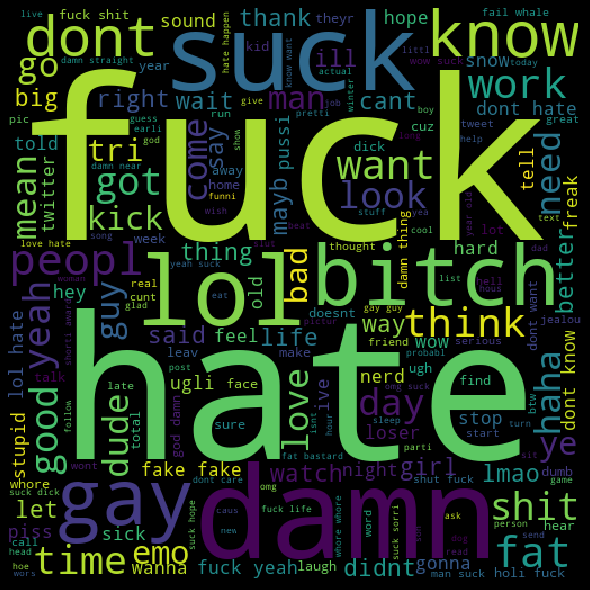

In [18]:
bully_words = ' '.join(list(tweet[tweet['label'] == 1]['tweet']))
bully_wc = WordCloud(width = 512,height = 512).generate(bully_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

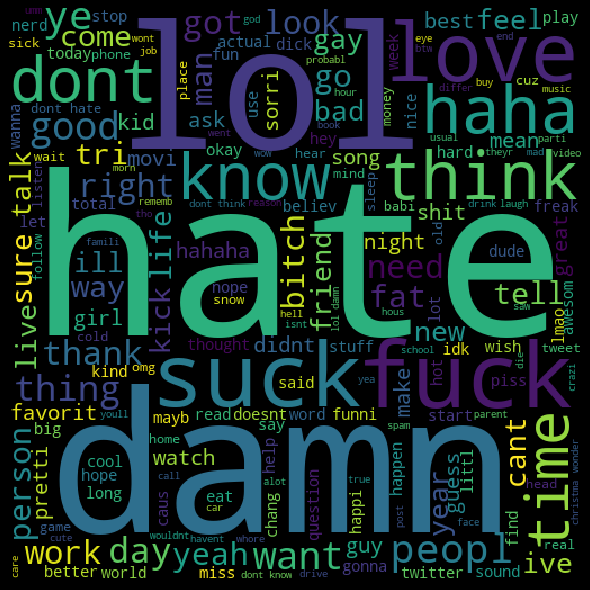

In [19]:
non_bully_words = ' '.join(list(tweet[tweet['label'] == 0]['tweet']))
non_bully_wc = WordCloud(width = 512,height = 512).generate(non_bully_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [20]:
# how to define X and y (from the Tweeter data) for use with COUNTVECTORIZER
X = tweet.tweet
y = tweet.label
print(X.shape)
print(y.shape)

(19001,)
(19001,)


In [21]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Users\ayon_\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(13300,)
(5701,)
(13300,)
(5701,)


In [22]:
def tokenize(tweet):
    words = word_tokenize(tweet)
    
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]
    
    return words

In [23]:
# instantiate the vectorizer
#args = {"stem": True, "lemmatize": False}
vect =  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='ISO-8859-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b')

vect2 =  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='ISO-8859-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', use_idf=True,
        vocabulary=None)
#vect = HashingVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='ISO-8859-1',
        input='content', lowercase=True, max_df=1.0, max_features=None,
        min_df=1, ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [25]:
# examine the document-term matrix
X_train_dtm

<13300x54917 sparse matrix of type '<class 'numpy.int64'>'
	with 146975 stored elements in Compressed Sparse Row format>

In [26]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(X_test_dtm)

  (0, 16499)	1
  (0, 16551)	1
  (0, 51460)	1
  (1, 9594)	2
  (1, 9597)	1
  (1, 9600)	1
  (1, 10144)	1
  (1, 10247)	1
  (1, 14550)	1
  (1, 14553)	1
  (1, 16124)	1
  (1, 16125)	1
  (1, 30300)	1
  (1, 30373)	1
  (1, 42833)	1
  (1, 42843)	1
  (1, 53272)	1
  (2, 3292)	1
  (2, 12290)	1
  (2, 12336)	1
  (2, 46065)	1
  (2, 46066)	1
  (4, 19247)	1
  (4, 19365)	1
  (4, 30674)	1
  :	:
  (5695, 39900)	1
  (5695, 48814)	1
  (5695, 48883)	1
  (5696, 29678)	1
  (5698, 12448)	1
  (5698, 12663)	1
  (5698, 13953)	1
  (5698, 44904)	1
  (5698, 45148)	1
  (5698, 46556)	1
  (5698, 53246)	1
  (5699, 8433)	1
  (5699, 12448)	1
  (5699, 12574)	1
  (5699, 26274)	1
  (5699, 26283)	1
  (5699, 27731)	2
  (5699, 29678)	3
  (5699, 29818)	1
  (5699, 45788)	1
  (5700, 6570)	1
  (5700, 6667)	1
  (5700, 21063)	1
  (5700, 21153)	1
  (5700, 50359)	1


In [27]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 185 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [30]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8438870373618663

In [31]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[2790,  621],
       [ 269, 2021]], dtype=int64)

In [32]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3411
           1       0.76      0.88      0.82      2290

   micro avg       0.84      0.84      0.84      5701
   macro avg       0.84      0.85      0.84      5701
weighted avg       0.85      0.84      0.85      5701



In [33]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.30953937, 0.99454466, 0.06197024, ..., 0.14460296, 0.00219301,
       0.39736219])

In [34]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9357549233855532

In [35]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
# train the model using X_train_dtm
%time lr.fit(X_train_dtm, y_train)

C:\Users\ayon_\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 612 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
# make class predictions for X_test_dtm
y_pred_class = lr.predict(X_test_dtm)

In [38]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = lr.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.4767729 , 0.84418996, 0.05088871, ..., 0.10348731, 0.01190126,
       0.6011416 ])

In [39]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8765128924750044

In [40]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2888,  523],
       [ 181, 2109]], dtype=int64)

In [41]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3411
           1       0.80      0.92      0.86      2290

   micro avg       0.88      0.88      0.88      5701
   macro avg       0.87      0.88      0.87      5701
weighted avg       0.88      0.88      0.88      5701



In [42]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9384575845677805

In [43]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(weights='distance', n_neighbors=2)  
%time kn.fit(X_train_dtm, y_train)

Wall time: 4 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [44]:
y_pred_class = kn.predict(X_test_dtm)

In [45]:
metrics.accuracy_score(y_test, y_pred_class)

0.7963515172776706

In [46]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2389, 1022],
       [ 139, 2151]], dtype=int64)

In [47]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80      3411
           1       0.68      0.94      0.79      2290

   micro avg       0.80      0.80      0.80      5701
   macro avg       0.81      0.82      0.80      5701
weighted avg       0.84      0.80      0.80      5701



In [48]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9384575845677805

In [49]:
from sklearn import tree
dc = tree.DecisionTreeClassifier(criterion='entropy')
%time dc.fit(X_train_dtm, y_train)

Wall time: 7.92 s


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred_class = dc.predict(X_test_dtm)

In [51]:
metrics.accuracy_score(y_test, y_pred_class)

0.8319593053850202

In [52]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2587,  824],
       [ 134, 2156]], dtype=int64)

In [53]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      3411
           1       0.72      0.94      0.82      2290

   micro avg       0.83      0.83      0.83      5701
   macro avg       0.84      0.85      0.83      5701
weighted avg       0.86      0.83      0.83      5701



In [54]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9384575845677805

In [55]:
from sklearn import svm
svl = svm.LinearSVC()
%time svl.fit(X_train_dtm, y_train)

Wall time: 903 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [56]:
y_pred_class = svl.predict(X_test_dtm)

In [57]:
metrics.accuracy_score(y_test, y_pred_class)

0.8707244343097702

In [58]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2814,  597],
       [ 140, 2150]], dtype=int64)

In [59]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3411
           1       0.78      0.94      0.85      2290

   micro avg       0.87      0.87      0.87      5701
   macro avg       0.87      0.88      0.87      5701
weighted avg       0.88      0.87      0.87      5701



In [60]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9384575845677805

In [61]:
sv = svm.SVC(gamma = 10)
%time sv.fit(X_train_dtm, y_train)

Wall time: 1min 21s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
#import pickle
#filename = 'finalized_model.sav'
#pickle.dump(sv, open(filename, 'wb'))

In [63]:
y_pred_class = sv.predict(X_test_dtm)

In [64]:
metrics.accuracy_score(y_test, y_pred_class)

0.9473776530433258

In [65]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[3354,   57],
       [ 243, 2047]], dtype=int64)

In [66]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3411
           1       0.97      0.89      0.93      2290

   micro avg       0.95      0.95      0.95      5701
   macro avg       0.95      0.94      0.94      5701
weighted avg       0.95      0.95      0.95      5701



## Examining a model for further insight


In [67]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

54917

In [68]:
Nonbullying materials classified as bullying)
X_test[y_test < y_pred_class].head(10)

SyntaxError: invalid syntax (<ipython-input-68-3fa98ffab33d>, line 1)

In [69]:
(bullying materials classified as nonbullying)
X_test[y_test > y_pred_class].head(10)

SyntaxError: invalid syntax (<ipython-input-69-68a981429584>, line 1)

In [70]:
# examine the first 100 tokens
print(X_train_tokens[0:100])

['aaand', 'aaand needa', 'aaargh', 'aaarrrg', 'aah', 'aah actual', 'aah twitorfitcom', 'aardvark', 'aardvark discont', 'aargh', 'aargh hate', 'aaron', 'aaron carter', 'aaron hugest', 'aaronag', 'aaronag sure', 'aarontait', 'aarontait come', 'aawwhh', 'aawwhh damn', 'abandon', 'abandon wilder', 'abbey', 'abbey bier', 'abbi', 'abbi aint', 'abcd', 'abcd right', 'abid', 'abid famili', 'abil', 'abil busi', 'abil fli', 'abil immov', 'abil kick', 'abil print', 'abil work', 'abl', 'abl bare', 'abl basic', 'abl bath', 'abl chang', 'abl connect', 'abl control', 'abl damn', 'abl drive', 'abl fli', 'abl half', 'abl hide', 'abl ive', 'abl know', 'abl pull', 'abl resist', 'abl retriev', 'abl spend', 'abl talk', 'abl telepath', 'abl view', 'abl walk', 'abort', 'abour', 'abour retir', 'aboustli', 'aboustli love', 'aboutnow', 'abouty', 'abovedalaw', 'abovedalaw iamdalaw', 'abraham', 'abraham lincoln', 'abram', 'abram scorses', 'abrill', 'abrill iloveyhuuu', 'abs', 'abs uncomfort', 'absit', 'absit porn'

In [71]:
# examine the last 100 tokens
print(X_train_tokens[-100:])

['yurself', 'yuu', 'yuu luh', 'yuu meann', 'yuu wannnaa', 'yuu wit', 'yuuu', 'yuuu got', 'yuuu moreep', 'yuuuaaa', 'yuuuaaa akekek', 'yvett', 'yvett damn', 'yvonn', 'yvonn littl', 'yvonn that', 'ywan', 'ywan lmao', 'yyyyou', 'yyyyou love', 'zac', 'zac efron', 'zach', 'zach gettin', 'zach tell', 'zacki', 'zacki sorri', 'zackli', 'zackli thing', 'zak', 'zak come', 'zarlom', 'zarlom your', 'zco', 'zealand', 'zebra', 'zebra cross', 'zebra lol', 'zebra man', 'zee', 'zee hair', 'zeno', 'zeno finalist', 'zero', 'zero absolut', 'zero alright', 'zero long', 'zerooooo', 'zest', 'zest life', 'zig', 'zig idri', 'zimbabw', 'zimbabw put', 'zip', 'zip fat', 'zipper', 'zipper peopl', 'zipper sure', 'zippo', 'zippo fuel', 'zit', 'zit chin', 'zit like', 'zodiac', 'zodiac sign', 'zomb', 'zomb invad', 'zombi', 'zombi cruel', 'zombi cum', 'zombi eat', 'zombi flick', 'zombi freak', 'zombi haha', 'zombi movi', 'zomgon', 'zomgz', 'zomgz fontfe', 'zon', 'zon raar', 'zone', 'zone bitch', 'zone shoot', 'zoom', '

In [72]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [73]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 54917)

In [74]:
# number of times each token appears across all Nonbullying messages
nonbullying_token_count = nb.feature_count_[0, :]
nonbullying_token_count

array([0., 0., 1., ..., 0., 0., 0.])

In [75]:
# number of times each token appears across all Bullying messages
bullying_token_count = nb.feature_count_[1, :]
bullying_token_count

array([1., 1., 0., ..., 1., 1., 1.])

In [76]:
# create a DataFrame of tokens with their separate counts
tokens = pd.DataFrame({'token':X_train_tokens, 'Nonbullying':nonbullying_token_count, 'Bullying':bullying_token_count}).set_index('token')
tokens.head(10)

,Nonbullying,Bullying
token,,
aaand,0.0,1.0
aaand needa,0.0,1.0
aaargh,1.0,0.0
aaarrrg,0.0,2.0
aah,1.0,2.0
aah actual,0.0,2.0
aah twitorfitcom,1.0,0.0
aardvark,0.0,3.0
aardvark discont,0.0,3.0


In [77]:
# examine 10 random DataFrame rows
tokens.sample(10, random_state=100)

,Nonbullying,Bullying
token,,
love dream,0.0,3.0
playa hate,1.0,0.0
hip,3.0,4.0
damn peopl,1.0,0.0
thing autolaunch,1.0,0.0
supr,1.0,0.0
gonna nerd,0.0,2.0
stage gain,0.0,2.0
pick radish,0.0,2.0


In [78]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([7751., 5549.])

In [79]:
# add 1 to counts to avoid dividing by 0
tokens['Nonbullying'] = tokens.Nonbullying + 1
tokens['Bullying'] = tokens.Bullying + 1
tokens.sample(10, random_state=100)

,Nonbullying,Bullying
token,,
love dream,1.0,4.0
playa hate,2.0,1.0
hip,4.0,5.0
damn peopl,2.0,1.0
thing autolaunch,2.0,1.0
supr,2.0,1.0
gonna nerd,1.0,3.0
stage gain,1.0,3.0
pick radish,1.0,3.0


In [80]:
# convert the bullying and non bullying counts into frequencies
tokens['Nonbullying'] = tokens.Nonbullying / nb.class_count_[0]
tokens['Bullying'] = tokens.Bullying / nb.class_count_[1]
tokens.sample(10, random_state=100)

,Nonbullying,Bullying
token,,
love dream,0.000129,0.000721
playa hate,0.000258,0.000180
hip,0.000516,0.000901
damn peopl,0.000258,0.000180
thing autolaunch,0.000258,0.000180
supr,0.000258,0.000180
gonna nerd,0.000129,0.000541
stage gain,0.000129,0.000541
pick radish,0.000129,0.000541


In [81]:
# calculate the ratio of bullying for each token
tokens['Bullying_ratio'] = tokens.Bullying / tokens.Nonbullying
tokens.sample(10, random_state=100)

,Nonbullying,Bullying,Bullying_ratio
token,,,
love dream,0.000129,0.000721,5.587313
playa hate,0.000258,0.000180,0.698414
hip,0.000516,0.000901,1.746035
damn peopl,0.000258,0.000180,0.698414
thing autolaunch,0.000258,0.000180,0.698414
supr,0.000258,0.000180,0.698414
gonna nerd,0.000129,0.000541,4.190485
stage gain,0.000129,0.000541,4.190485
pick radish,0.000129,0.000541,4.190485


In [82]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('Bullying_ratio', ascending=False)

,Nonbullying,Bullying,Bullying_ratio
token,,,
kjfuck,0.000129,0.002343,18.158767
fuck dude,0.000129,0.002343,18.158767
whore whore,0.000129,0.002343,18.158767
bull,0.000129,0.002343,18.158767
fucker,0.000129,0.002343,18.158767
kjfuck time,0.000129,0.002343,18.158767
goddamn kjfuck,0.000129,0.002343,18.158767
hood,0.000129,0.001982,15.365111
think gay,0.000129,0.001982,15.365111


In [83]:
# look up the Bullying_ratio for a given token
tokens.loc['rape', 'Bullying_ratio']

0.9977344695311896

In [84]:
sample_test = ["I will rape you"]

In [85]:
sample_test_dtm = vect.transform(sample_test)
print(sample_test_dtm)

  (0, 38628)	1
  (0, 52470)	1
  (0, 54397)	1


In [86]:
print(X_train_tokens[1111])

anagram


In [87]:
sample_pred_nb = nb.predict(sample_test_dtm)
sample_pred_lr = lr.predict(sample_test_dtm)
sample_pred_kn = kn.predict(sample_test_dtm)
sample_pred_dc = dc.predict(sample_test_dtm)
sample_pred_svl = svl.predict(sample_test_dtm)
sample_pred_sv = sv.predict(sample_test_dtm)

In [88]:
print("naive bayes predicted:           ",sample_pred_nb)
print("logistic regression predicted:   ",sample_pred_lr)
print("k-nearest neighbours predicted:  ",sample_pred_kn)
print("decision tree predicted:         ",sample_pred_dc)
print("linear support vector predicted: ",sample_pred_svl)
print("rbf support vector predicted:    ",sample_pred_sv)

naive bayes predicted:            [0]
logistic regression predicted:    [0]
k-nearest neighbours predicted:   [0]
decision tree predicted:          [0]
linear support vector predicted:  [0]
rbf support vector predicted:     [0]


In [89]:
#Deep Learning Part
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

Using TensorFlow backend.


You have TensorFlow version 1.13.1


In [90]:
data = pd.read_csv("data/hhh.csv", encoding="ISO-8859-1")
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 15200
Test size: 3801


In [91]:
train_posts = data['post'][:train_size]
train_tags = data['tags'][:train_size]

test_posts = data['post'][train_size:]
test_tags = data['tags'][train_size:]

In [92]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [93]:
tokenize.fit_on_texts(train_posts) 
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [94]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [95]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [96]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (15200, 1000)
x_test shape: (3801, 1000)
y_train shape: (15200, 2)
y_test shape: (3801, 2)


In [97]:
batch_size = 32
epochs = 2

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [98]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 13680 samples, validate on 1520 samples
Epoch 1/2
13680/13680 [==============================] - ETA: 48:11 - loss: 0.7338 - acc: 0.31 - ETA: 12:03 - loss: 0.6985 - acc: 0.50 - ETA: 6:01 - loss: 0.6870 - acc: 0.5352 - ETA: 4:00 - loss: 0.6759 - acc: 0.578 - ETA: 3:00 - loss: 0.6708 - acc: 0.578 - ETA: 2:24 - loss: 0.6707 - acc: 0.579 - ETA: 1:59 - loss: 0.6845 - acc: 0.565 - ETA: 1:42 - loss: 0.6851 - acc: 0.565 - ETA: 1:29 - loss: 0.6847 - acc: 0.573 - ETA: 1:19 - loss: 0.6835 - acc: 0.575 - ETA: 1:11 - loss: 0.6848 - acc: 0.580 - ETA: 1:04 - loss: 0.6811 - acc: 0.589 - ETA: 1:00 - loss: 0.6810 - acc: 0.590 - ETA: 56s - loss: 0.6794 - acc: 0.592 - ETA: 53s - loss: 0.6787 - acc: 0.59 - ETA: 50s - loss: 0.6754 - acc: 0.60 - ETA: 47s - loss: 0.6746 - acc: 0.60 - ETA: 44s - loss: 0.6730 - acc: 0.61 - ETA: 41s - loss: 0.6710 - acc: 0.61 - ETA: 38s - loss: 0.6685 - acc: 0.61 - ETA: 36s - loss: 0.6658 - acc: 0.62 - ETA: 34s - loss: 0.6

In [99]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

3801/3801 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 83us/step


In [100]:
print('Test accuracy:', score[1])

Test accuracy: 0.922388844899647


In [101]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [102]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

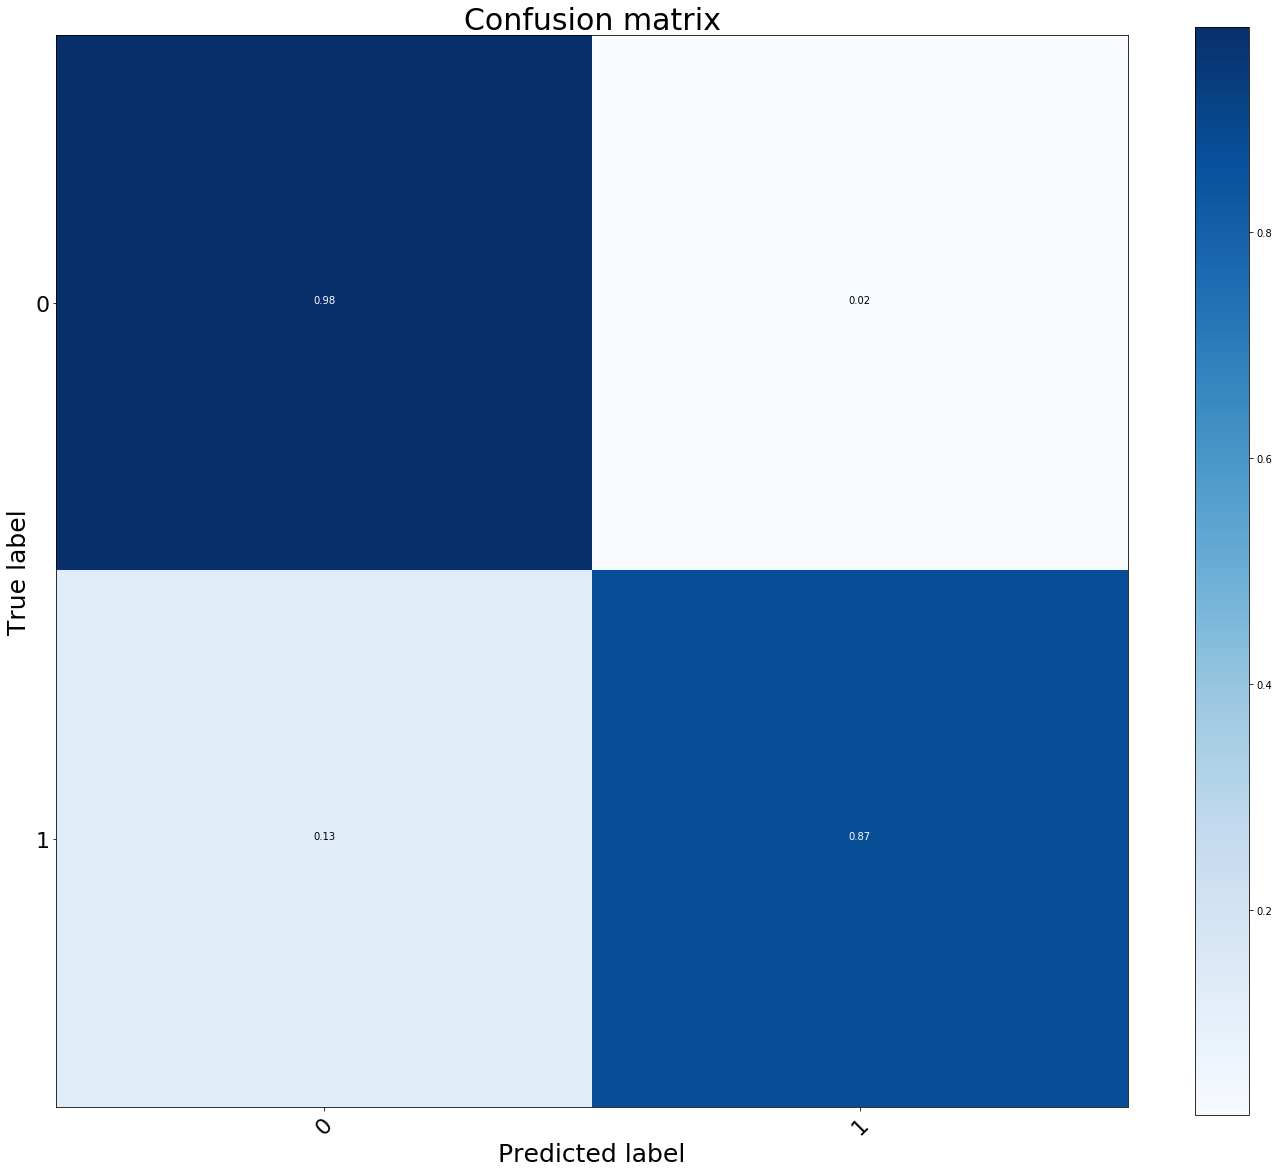

In [103]:
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [104]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split
import pandas as pd
#from data_helpers import load_data

tweet = pd.read_csv("data/h.csv", encoding="ISO-8859-1")
tweet.rename(columns = {"annotation__label__-": "label", "content": "tweet"}, inplace = True)
tweet.drop(['annotation__notes'], axis = 1, inplace = True)
tweet.drop(['extras'], axis = 1, inplace = True)
x = tweet.tweet
y = tweet.label
#print('Loading data')
#x, y, vocabulary, vocabulary_inv = load_data()

# x.shape -> (10662, 56)
# y.shape -> (10662, 2)
# len(vocabulary) -> 18765
# len(vocabulary_inv) -> 18765

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# X_train.shape -> (8529, 56)
# y_train.shape -> (8529, 2)
# X_test.shape -> (2133, 56)
# y_test.shape -> (2133, 2)


sequence_length = x.shape[1] # 56
vocabulary_size = len(vocabulary_inv) # 18765
embedding_dim = 256
filter_sizes = [3,4,5]
num_filters = 512
drop = 0.5

epochs = 100
batch_size = 30

# this returns a tensor
print("Creating Model...")
inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length)(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=2, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
print("Traning Model...")
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(X_test, y_test))  # starts training


IndexError: tuple index out of range